<a href="https://colab.research.google.com/github/deepa-tyagi/global-td/blob/main/Copy_of_Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [3]:
#importing necessery libraries for future analysis of the dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import seaborn as sns

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 1 <b> LOADING DATA SET

In [6]:
#ISO/IEC 8859-1 encodes what it refers to as "Latin alphabet no. 1"

gtd = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/capston project/Global Terrorism Data.csv',encoding='ISO-8859-1')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


For given data set, each column is demanding very high memory, pandas tries to determine what dtype to set by analyzing the data in each column.


In [7]:
#information about data frame
gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Columns: 135 entries, eventid to related
dtypes: float64(55), int64(22), object(58)
memory usage: 187.1+ MB


In [8]:
pd.set_option('display.max_columns',None)
gtd.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [9]:
gtd.country

0          58
1         130
2         160
3          78
4         101
         ... 
181686    182
181687    200
181688    160
181689     92
181690    160
Name: country, Length: 181691, dtype: int64

## 2 <b> **Understadning, Wrangling and Cleaning Data** <b> ##

In [10]:
gtd.isnull().sum()

eventid            0
iyear              0
imonth             0
iday               0
approxdate    172452
               ...  
INT_LOG            0
INT_IDEO           0
INT_MISC           0
INT_ANY            0
related       156653
Length: 135, dtype: int64

In [11]:
# the data set have more than 60% of NAN values so lets drop the unnessary columns by using for loop 
column = []
for i in gtd.columns:
  if gtd[i].isnull().sum()>15000:
    column.append(i)
gtd.drop(column,inplace=True,axis=1)    

In [ ]:
gtd.head(3)

,eventid,iyear,imonth,iday,extended,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,attacktype1_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,target1,natlty1,natlty1_txt,gname,guncertain1,individual,weaptype1,weaptype1_txt,nkill,property,ishostkid,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
0,197000000001,1970,7,2,0,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,14,Private Citizens & Property,68.0,Named Civilian,Julio Guzman,58.0,Dominican Republic,MANO-D,0.0,0,13,Unknown,1.0,0,0.0,PGIS,0,0,0,0
1,197000000002,1970,0,0,0,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,1,1,1,0.0,0.0,1,0,6,Hostage Taking (Kidnapping),7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...","Nadine Chaval, daughter",21.0,Belgium,23rd of September Communist League,0.0,0,13,Unknown,0.0,0,1.0,PGIS,0,1,1,1
2,197001000001,1970,1,0,0,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,1,1,1,0.0,0.0,1,0,1,Assassination,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Employee,217.0,United States,Unknown,0.0,0,13,Unknown,1.0,0,0.0,PGIS,-9,-9,1,1


In [12]:
gtd.rename(columns={'iyear':'Year','imonth':'Month','iday':"day",'gname':'Group','country_txt':'Countrys_','region_txt':'Region',
                     'provstate':'State','city':'city','latitude':'latitude','longitude':'longitude','summary':'summary',
                     'attacktype1_txt':'Attacktype','targtype1_txt':'Targettype','weaptype1_txt':'Weapon','nkill':'kill',
                     'nwound':'Wound'},inplace=True)

In [13]:
# created a work bench that we need only perform analysis in this
gtd = gtd[['Year','Month','day','Countrys_','State','Region','city','latitude','longitude',"Attacktype",'kill',
               'Wound','target1','summary','Group','Targettype','Weapon','motive']]
gtd.head()

KeyError: ignored

In [14]:
gtd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 181691 entries, 0 to 181690
Data columns (total 44 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   eventid           181691 non-null  int64  
 1   Year              181691 non-null  int64  
 2   Month             181691 non-null  int64  
 3   day               181691 non-null  int64  
 4   extended          181691 non-null  int64  
 5   country           181691 non-null  int64  
 6   Countrys_         181691 non-null  object 
 7   region            181691 non-null  int64  
 8   Region            181691 non-null  object 
 9   State             181270 non-null  object 
 10  city              181257 non-null  object 
 11  latitude          177135 non-null  float64
 12  longitude         177134 non-null  float64
 13  specificity       181685 non-null  float64
 14  vicinity          181691 non-null  int64  
 15  crit1             181691 non-null  int64  
 16  crit2             18

In [15]:
gtd.describe()

,eventid,Year,Month,day,extended,country,region,latitude,longitude,specificity,vicinity,crit1,crit2,crit3,doubtterr,multiple,success,suicide,attacktype1,targtype1,targsubtype1,natlty1,guncertain1,individual,weaptype1,kill,property,ishostkid,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,1.816910e+05,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,181691.000000,177135.000000,1.771340e+05,181685.000000,181691.000000,181691.000000,181691.000000,181691.000000,181690.000000,181690.000000,181691.000000,181691.000000,181691.000000,181691.000000,171318.000000,180132.000000,181311.000000,181691.000000,181691.000000,171378.000000,181691.000000,181513.000000,181691.000000,181691.000000,181691.000000,181691.000000
mean,2.002705e+11,2002.638997,6.467277,15.505644,0.045346,131.968501,7.160938,23.498343,-4.586957e+02,1.451452,0.068297,0.988530,0.993093,0.875668,-0.523171,0.137773,0.889598,0.036507,3.247547,8.439719,46.971474,127.686441,0.081440,0.002950,6.447325,2.403272,-0.544556,0.059054,-4.543731,-4.464398,0.090010,-3.945952
std,1.325957e+09,13.259430,3.388303,8.814045,0.208063,112.414535,2.933408,18.569242,2.047790e+05,0.995430,0.284553,0.106483,0.082823,0.329961,2.455819,0.344663,0.313391,0.187549,1.915772,6.653838,30.953357,89.299120,0.273511,0.054234,2.173435,11.545741,3.122889,0.461244,4.543547,4.637152,0.568457,4.691325
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,1.000000,-53.154613,-8.618590e+07,1.000000,-9.000000,0.000000,0.000000,0.000000,-9.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,4.000000,0.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,1.991021e+11,1991.000000,4.000000,8.000000,0.000000,78.000000,5.000000,11.510046,4.545640e+00,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,2.000000,3.000000,22.000000,83.000000,0.000000,0.000000,5.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.009022e+11,2009.000000,6.000000,15.000000,0.000000,98.000000,6.000000,31.467463,4.324651e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,4.000000,35.000000,101.000000,0.000000,0.000000,6.000000,0.000000,1.000000,0.000000,-9.000000,-9.000000,0.000000,0.000000
75%,2.014081e+11,2014.000000,9.000000,23.000000,0.000000,160.000000,10.000000,34.685087,6.871033e+01,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,3.000000,14.000000,74.000000,173.000000,0.000000,0.000000,6.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2.017123e+11,2017.000000,12.000000,31.000000,1.000000,1004.000000,12.000000,74.633553,1.793667e+02,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,22.000000,113.000000,1004.000000,1.000000,1.000000,13.000000,1570.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3 <b> EXPLORING & VISUALIZING DATA <b> ##

##    TOP 10 COUNTRIES WHO ARE MOST AFFECTED BY THE TERRORIST





In [16]:
#Which are the top 10 Countries who are most affected by the terrorist attacks
print('Country with Highest Terrorist Attacks:\n',
     gtd ['Countrys_'].value_counts().head (10))

Country with Highest Terrorist Attacks:
 Iraq              24636
Pakistan          14368
Afghanistan       12731
India             11960
Colombia           8306
Philippines        6908
Peru               6096
El Salvador        5320
United Kingdom     5235
Turkey             4292
Name: Countrys_, dtype: int64


## CITY WISE ATTACKS 

In [17]:
# city wise attacks
city=gtd["city"].value_counts()[1:11]
city

Baghdad         7589
Karachi         2652
Lima            2359
Mosul           2265
Belfast         2171
Santiago        1621
Mogadishu       1581
San Salvador    1558
Istanbul        1048
Athens          1019
Name: city, dtype: int64

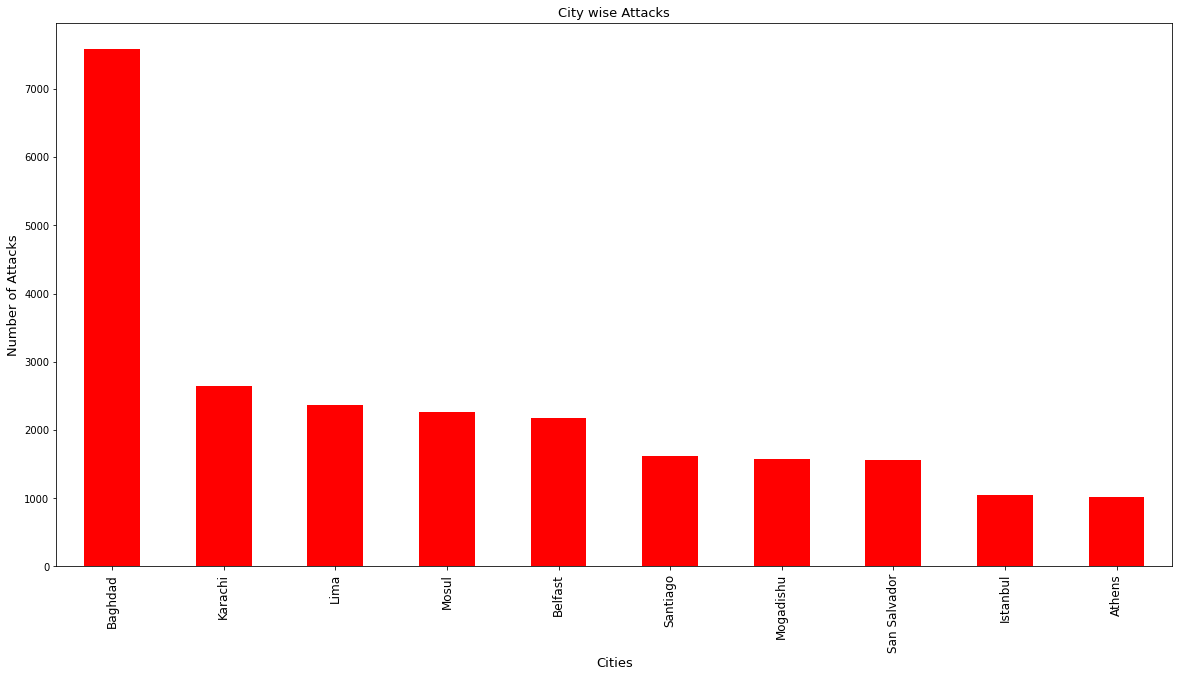

In [18]:
# creating a bar chart for city wise attacks 
city.plot(kind="bar",color="red",figsize=(20,10))
plt.title("City wise Attacks",fontsize=13)
plt.xlabel("Cities",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()

 * OBSERVATION 
 HIGHEST ATTACKS IN BAGHDAD 



## YEAR WISE ATTACKS

In [19]:
# YEAR WISE ATTACKS
attacks = gtd["Year"].value_counts(dropna=False).sort_index().to_frame().reset_index().rename(columns={"index":"Year","Year":"Attacks"}).set_index("Year")
attacks.head(10)


,Attacks
Year,
1970,651
1971,471
1972,568
1973,473
1974,581
1975,740
1976,923
1977,1319
1978,1526


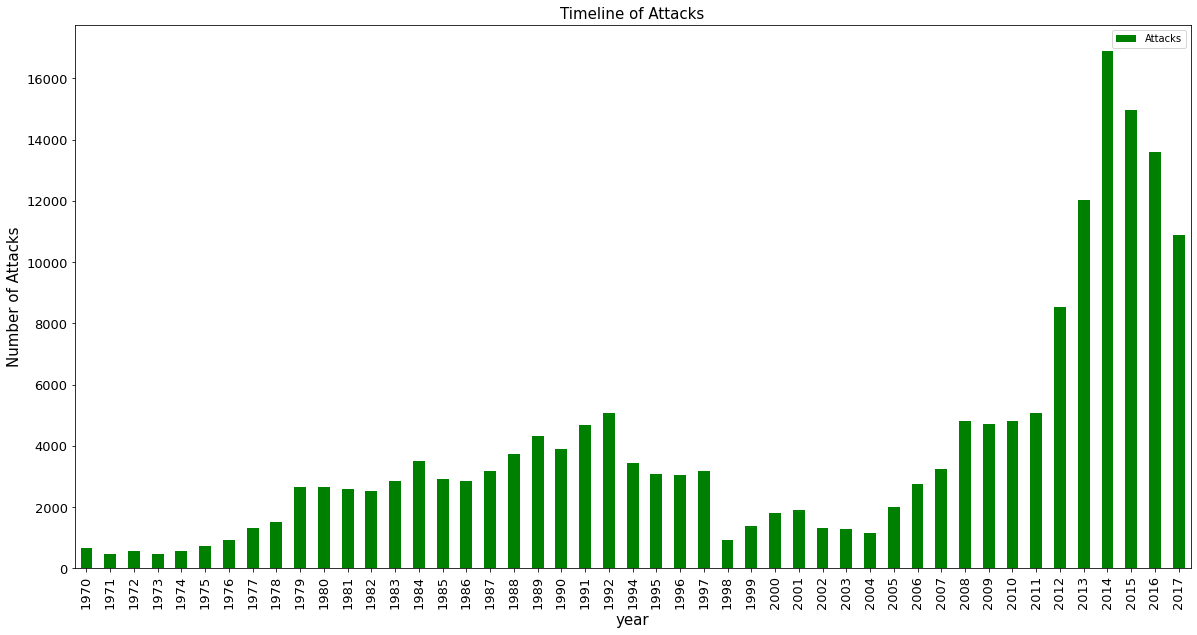

In [20]:
attacks.plot(kind="bar",color="green",figsize=(20,10),fontsize=13)
plt.title("Timeline of Attacks",fontsize=15)
plt.xlabel("year",fontsize=15)
plt.ylabel("Number of Attacks",fontsize=15)
plt.show()

***OBSERVATION*** from above  chart

 (i). Most number of attacks(16903) in 2014

  (ii). Least number of attacks(471) in 1971

# ***Region wise Attacks***
Distribution of Terrorist Attacks over Regions from 1970-2017

In [38]:
reg= pd.crosstab(gtd.Year,gtd.Region)
reg.head()

Region,Australasia & Oceania,Central America & Caribbean,Central Asia,East Asia,Eastern Europe,Middle East & North Africa,North America,South America,South Asia,Southeast Asia,Sub-Saharan Africa,Western Europe
Year,,,,,,,,,,,,
1970,1,7,0,2,12,28,472,65,1,10,3,50
1971,1,5,0,1,5,55,247,24,0,6,2,125
1972,8,3,0,0,1,53,73,33,1,16,4,376
1973,1,6,0,2,1,19,64,83,1,2,4,290
1974,1,11,0,4,2,42,111,81,2,3,7,317


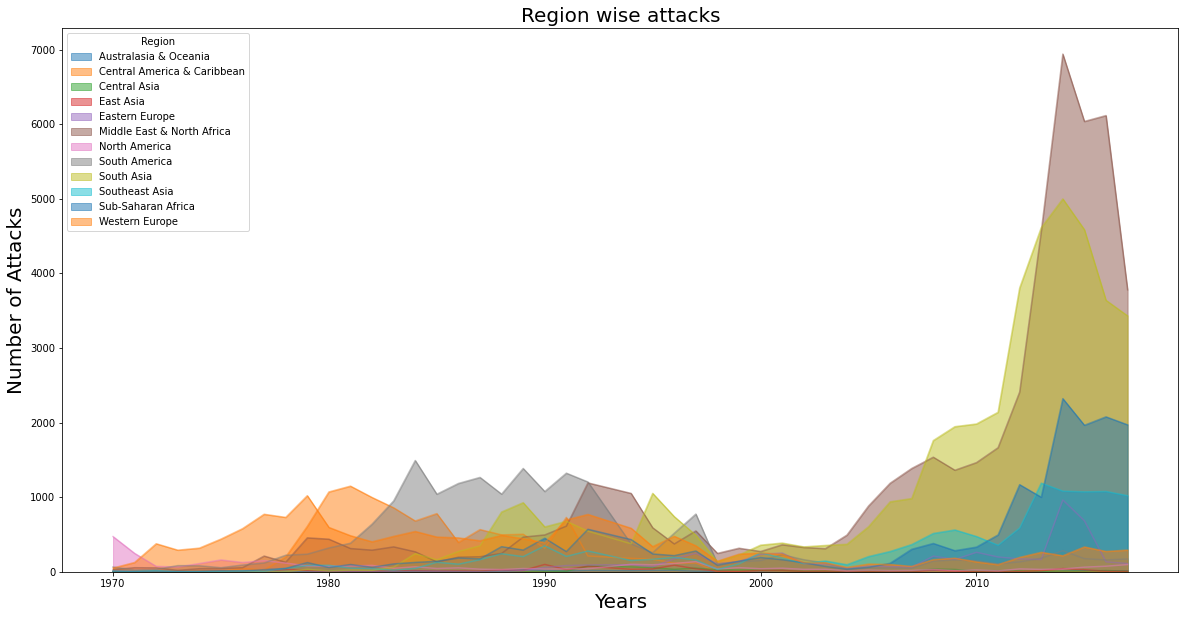

In [39]:
reg.plot(kind="area", stacked=False, alpha=0.5,figsize=(20,10))
plt.title("Region wise attacks",fontsize=20)
plt.xlabel("Years",fontsize=20)
plt.ylabel("Number of Attacks",fontsize=20)
plt.show()

ATTACKS IN REGIONS

---

*   Killed vs Region
*   wounded vs region
*   Attacks Vs killed







In [ ]:
#region value_counts() for infomation

pd.DataFrame(gtd.Region.value_counts())

,Region
Middle East & North Africa,50474
South Asia,44974
South America,18978
Sub-Saharan Africa,17550
Western Europe,16639
Southeast Asia,12485
Central America & Caribbean,10344
Eastern Europe,5144
North America,3456
East Asia,802


Killed vs Region

---




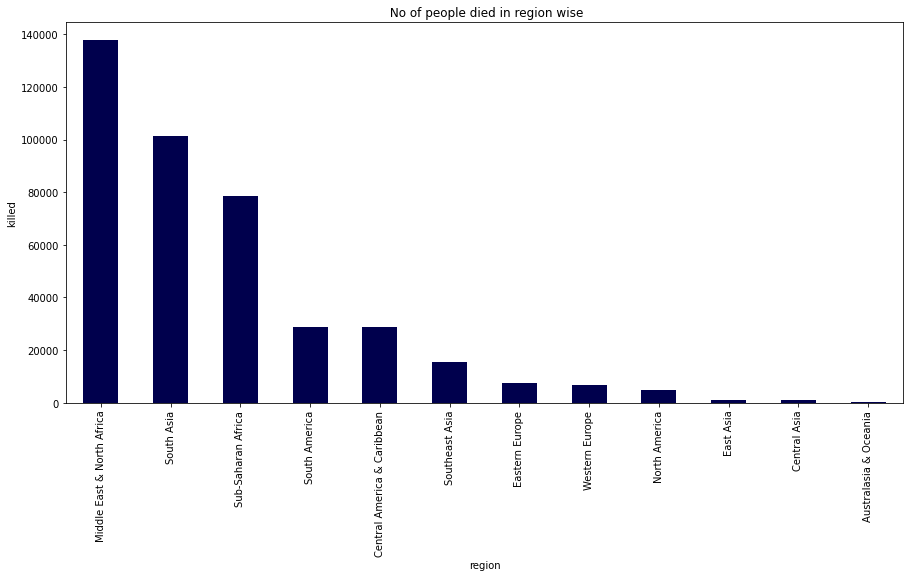

In [ ]:
# created bar plot by using matplotlib.pyplot as plt for region wise killed
plt.figure(figsize=(15,7))
gtd.groupby(['Region'])['kill'].sum().sort_values(ascending = False).plot(kind='bar',colormap = 'seismic') 
plt.title(" No of people died in region wise")
# Set x and y-labels 
plt.ylabel('killed')
plt.xlabel('region')
plt.show()

 On above Bar chart we can see the most no of kills in region was middle east & north africa

wounded vs region

---










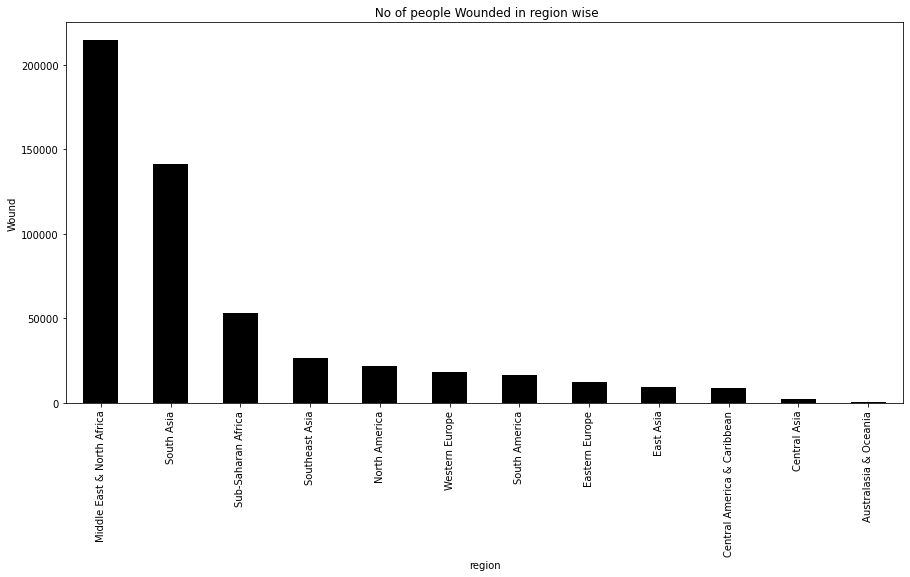

In [ ]:
# created bar plot by using matplotlib.pyplot as plt for region wise wonded
plt.figure(figsize=(15,7))
gtd.groupby(['Region'])['Wound'].sum().sort_values(ascending = False).plot(kind='bar',colormap = 'copper') 
plt.title(" No of people Wounded in region wise")
# Set x and y-labels 
plt.ylabel('Wound')
plt.xlabel('region')
plt.show()

Attacks Vs killed

---



In [22]:
# Create the figure object 
terroist_attacks = gtd['Countrys_'].value_count()[:15].to_frame()
terroist_attacks.columns=['Attacks']
#group by operation 
count_kill = gtd.groupby('countrys_')['kill'].sum().to_frame()
terroist_attacks.merge(count_kill,left_index = True,right_index = True,how='left').plot.bar(with = 0.9)
fig = plt.gif()
plt.title



SyntaxError: ignored

# Top 10 Terrorist Group wise Attacks

In [24]:
grp=gtd["Group"].value_counts()[1:10]
grp

Taliban                                             7478
Islamic State of Iraq and the Levant (ISIL)         5613
Shining Path (SL)                                   4555
Farabundo Marti National Liberation Front (FMLN)    3351
Al-Shabaab                                          3288
New People's Army (NPA)                             2772
Irish Republican Army (IRA)                         2671
Revolutionary Armed Forces of Colombia (FARC)       2487
Boko Haram                                          2418
Name: Group, dtype: int64

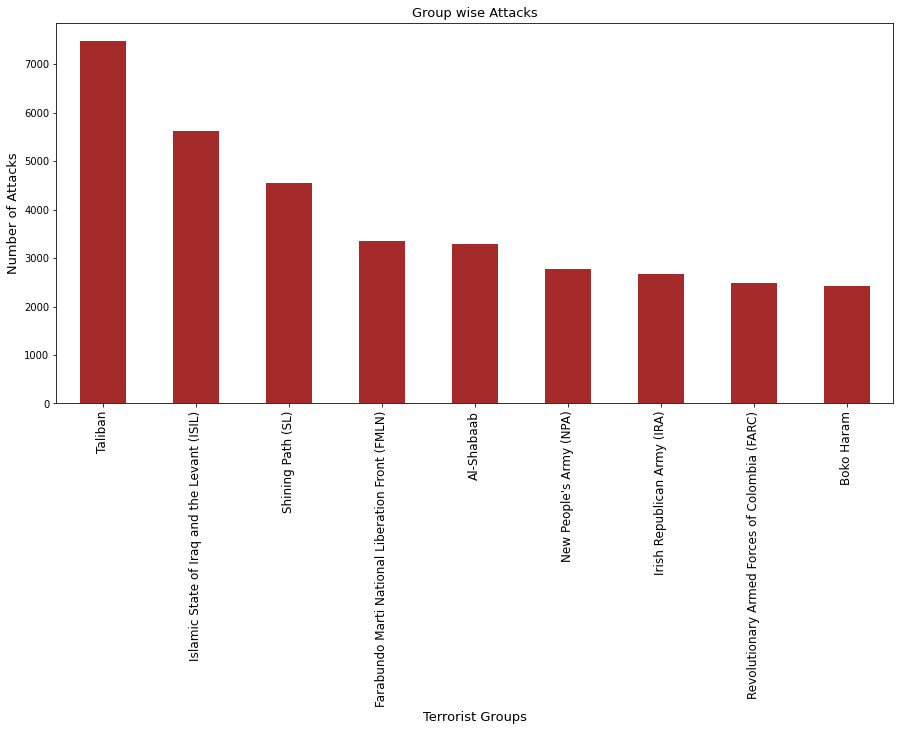

In [35]:
grp.plot(kind="bar",color="brown",figsize=(15,7))
plt.title("Group wise Attacks",fontsize=13)
plt.xlabel("Terrorist Groups",fontsize=13)
plt.xticks(fontsize=12)
plt.ylabel("Number of Attacks",fontsize=13)
plt.show()